In [1]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [2]:
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Lecture 5


<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will able to:**
* [`summarize()` and `count()`](#Wrapping-up-summarize()) data
* Use groups along with [mutate](#Grouped-mutates) ([§5.7](http://r4ds.had.co.nz/transform.html#grouped-mutates-and-filters))
* [Visualize distributions](#Visualizing-distributions) ([§7](http://r4ds.had.co.nz/exploratory-data-analysis.html))
</div>

## Who is the greatest batter of all time?
The `Lahman` dataset contains information on baseball players.

In [37]:
library(Lahman)
bat <- as_tibble(Batting) %>% print

# A tibble: 105,861 x 22
   playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 abercda…   1871     1 TRO    NA        1     4     0     0     0     0     0
 2 addybo01   1871     1 RC1    NA       25   118    30    32     6     0     0
 3 allisar…   1871     1 CL1    NA       29   137    28    40     4     5     0
 4 allisdo…   1871     1 WS3    NA       27   133    28    44    10     2     2
 5 ansonca…   1871     1 RC1    NA       25   120    29    39    11     3     0
 6 armstbo…   1871     1 FW1    NA       12    49     9    11     2     1     0
 7 barkeal…   1871     1 RC1    NA        1     4     0     1     0     0     0
 8 barnero…   1871     1 BS1    NA       31   157    66    63    10     9     0
 9 barrebi…   1871     1 FW1    NA        1     5     1     1     1     0     0
10 barrofr…   1871     1 BS1    NA       18    86    13    13     2     1     0
# … with 105,85

There is one row per player per year:

In [38]:
bat[2,] %>% print
# Lahman::playerInfo('addybo01')

# A tibble: 3 x 22
  playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
  <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
1 addybo01   1871     1 RC1    NA       25   118    30    32     6     0     0
2 allisar…   1871     1 CL1    NA       29   137    28    40     4     5     0
3 allisdo…   1871     1 WS3    NA       27   133    28    44    10     2     2
# … with 10 more variables: RBI <int>, SB <int>, CS <int>, BB <int>, SO <int>,
#   IBB <int>, HBP <int>, SH <int>, SF <int>, GIDP <int>


Bob Addy was active in the years 1871-1877. During that time he had $118+51+152+213+310+142+245=1231$ at-bats, and $32+16+54+51+80+40+68=341$ hits. Therefore his career batting average was $341/1241=0.277$.

In [5]:
filter(bat, playerID == "addybo01") %>% print

# A tibble: 7 x 22
  playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
  <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
1 addybo01   1871     1 RC1    NA       25   118    30    32     6     0     0
2 addybo01   1873     1 PH2    NA       10    51    12    16     1     0     0
3 addybo01   1873     2 BS1    NA       31   152    37    54     6     3     1
4 addybo01   1874     1 HR1    NA       50   213    25    51     9     2     0
5 addybo01   1875     1 PH2    NA       69   310    60    80     8     4     0
6 addybo01   1876     1 CHN    NL       32   142    36    40     4     1     0
7 addybo01   1877     1 CN1    NL       57   245    27    68     2     3     0
# … with 10 more variables: RBI <int>, SB <int>, CS <int>, BB <int>, SO <int>,
#   IBB <int>, HBP <int>, SH <int>, SF <int>, GIDP <int>


### Exercise
By appropriately grouping and summarizing the data, add up all the hits and at-bats for each player across all the years they played, and compute their career batting average. 

Which player(s) has the highest career batting average?

In [47]:
## Solution
group_by(bat, playerID) %>% 
    summarise(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
              total_AB = sum(AB, na.rm = T)) %>% 
    arrange(desc(bat_avg)) %>% print
#mutate(bat, bat_avg = H / AB) %>% select(playerID, yearID, H, AB, bat_avg) %>% 
#    

# A tibble: 19,428 x 3
   playerID  bat_avg total_AB
   <chr>       <dbl>    <int>
 1 abramge01       1        1
 2 alberan01       1        1
 3 allarko01       1        1
 4 banisje01       1        1
 5 bartocl01       1        1
 6 bassdo01        1        1
 7 birasst01       1        2
 8 bruneju01       1        1
 9 burnscb01       1        1
10 cammaer01       1        1
# … with 19,418 more rows


### Always include counts
It is a good idea to include counts of each group when you do a summary. Some groups may have very low numbers of observations, resulting in high variance for the summary statistics. 

What happens if we restrict our batting average calculation to players that had at least 100 at-bats?

In [50]:
## Solution
group_by(bat, playerID) %>% 
    mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
              total_AB = sum(AB, na.rm = T)) %>% 
    filter(playerID == "cobbty01") %>% select(playerID, yearID, bat_avg, total_AB) %>% print
#    arrange(desc(bat_avg)) %>% 
#    filter(total_AB > 100) %>% print

# A tibble: 24 x 4
# Groups:   playerID [1]
   playerID yearID bat_avg total_AB
   <chr>     <int>   <dbl>    <int>
 1 cobbty01   1905   0.366    11435
 2 cobbty01   1906   0.366    11435
 3 cobbty01   1907   0.366    11435
 4 cobbty01   1908   0.366    11435
 5 cobbty01   1909   0.366    11435
 6 cobbty01   1910   0.366    11435
 7 cobbty01   1911   0.366    11435
 8 cobbty01   1912   0.366    11435
 9 cobbty01   1913   0.366    11435
10 cobbty01   1914   0.366    11435
# … with 14 more rows


## Exercise
Which player had the highest batting average in a single season? After 1920?

In [8]:
## Solution

## Names of baseball players

Recently I have had to think a lot about names. Naming frequencies change a lot over time. There are 19617 baseball players in this data set. How have their names changed over time?

In [55]:
players <- as_tibble(Lahman::Master) %>% 
    filter(playerID == "cobbty01") %>%
    select(nameFirst, nameLast, nameGiven) %>% print
# pr
#    select(birthYear, nameFirst, nameLast, nameGiven) %>% print


# A tibble: 1 x 3
  nameFirst nameLast nameGiven    
  <chr>     <chr>    <chr>        
1 Ty        Cobb     Tyrus Raymond


## Exercise
What were the top five most common first names for players born before 1900? After 1980?

In [81]:
## Solution
filter(Master, birthYear < 1900) %>% as_tibble %>% count(nameFirst) %>% top_n(5) %>% 
       arrange(desc(n)) 

# select(Master, nameFirst, nameGiven) %>% print

Selecting by n


  nameFirst n  
1 Bill      288
2 John      216
3 George    186
4 Ed        159
5 Charlie   158

One thing we notice is that there are a lot of nicknames. It might make more sense to look at the "given name", which is usually the first and middle names. To do this, we will need to split up these names. There is a built-in command for doing this in R:

In [11]:
players_given <- separate(players, nameGiven, into = c("givenFirst", "rest")) %>% print

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1250 rows [7, 10, 37, 82, 132, 144, 156, 184, 208, 240, 247, 251, 263, 286, 291, 293, 315, 317, 336, 411, ...].”Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1688 rows [42, 50, 52, 74, 123, 127, 147, 161, 162, 163, 164, 165, 166, 175, 176, 182, 183, 189, 191, 201, ...].”

# A tibble: 19,617 x 5
   birthYear nameFirst nameLast    givenFirst rest   
       <int> <chr>     <chr>       <chr>      <chr>  
 1      1981 David     Aardsma     David      Allan  
 2      1934 Hank      Aaron       Henry      Louis  
 3      1939 Tommie    Aaron       Tommie     Lee    
 4      1954 Don       Aase        Donald     William
 5      1972 Andy      Abad        Fausto     Andres 
 6      1985 Fernando  Abad        Fernando   Antonio
 7      1850 John      Abadie      John       W      
 8      1877 Ed        Abbaticchio Edward     James  
 9      1869 Bert      Abbey       Bert       Wood   
10      1866 Charlie   Abbey       Charles    S      
# … with 19,607 more rows


## Exercise
Redo the analysis of the previous exercise using `givenFirst` instead of `nameFirst`. How do the results change?

In [12]:
## Solution

## Finding distinct values

Here's an example: I want to know how many distinct values are there? The `n_distinct()` function takes a vector of values, and returns the number of distinct values:

In [13]:
n_distinct(c("Michigan", "Ohio", "STATS 306", "Michigan"))

[1] 3

## Exercise
How many distinct names were there among players born before 1900? After 1980?

In [93]:
## Solution
Master %>% filter(birthYear < 1910) %>% select(nameFirst) %>%
    pluck("nameFirst") %>% n_distinct

#group_by(birthYear) %>% 
           #summarize(nd = n_distinct(nameFirst)) %>% 
           #
#            summarize(sum(nd))

[1] 1078

Are there more or less unique names now than there were in the past? Let's consider the number of distinct names seen in each year:

## Exercise
Reproduce the plot:
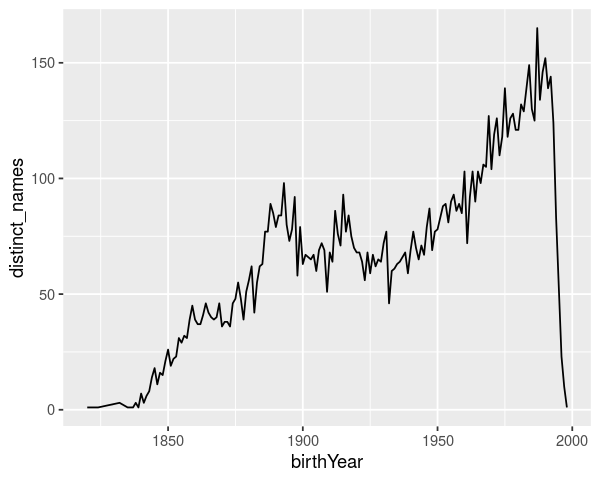

In [15]:
## Solution

## Ranking functions
Sometimes, we want to *rank* our data by assigning integers for 1st place, 2nd place, etc. The functions `dense_rank()`, `min_rank()`, and `row_number()` can be used for this purpose:

In [16]:
gpas = c(3.9, 3.8, 2.7, 3.8, 4.0, 4.0)
dense_rank(gpas)
min_rank(gpas)
row_number(gpas)

[1] 3 2 1 2 4 4

[1] 4 2 1 2 5 5

[1] 4 2 1 3 5 6

Note the differences in behavior: 
- The rankings from `dense_rank()` never have gaps.
- The rankings from `min_rank()` skips over 3rd place (because we have two entries tied for 2nd.)
- The ranksings from `row_number()` break ties arbitrarily, so the first 4.0 GPA gets ranked 5th, and the second 4.0 GPA gets ranked 6th.

By default, the ranking functions rank lowest first. If we want to reverse that, and assign rank 1 to the highest entry, we can use the `desc()` function:

In [17]:
dense_rank(desc(gpas))
min_rank(desc(gpas))
row_number(desc(gpas))

[1] 2 3 4 3 1 1

[1] 3 4 6 4 1 1

[1] 3 4 6 5 1 2

Suppose we want to add ranks to each name in each year. You might think to do something like:

        > count(players, birthYear) %>%
        summarize(r = dense_rank(givenFirst))
    
But this generates an error. Why?

In [18]:
# count(players_given, birthYear) %>% summarize(r = dense_rank(givenFirst))

## Grouped mutate
What we would like to do is add ranks within each group, but *not collapse out the groups*. This is called a "grouped mutate". Example: find the second-most common name each year:

In [99]:
count(Master, birthYear, nameFirst) %>%
    group_by(birthYear) %>%
    mutate(r = row_number(-n)) %>% 
    filter(r == 10)

    birthYear nameFirst n r 
1   1844      Henry     1 10
2   1845      Henry     1 10
3   1846      Hugh      1 10
4   1847      Fred      1 10
5   1848      Frank     1 10
6   1849      Clipper   1 10
7   1850      Charlie   1 10
8   1851      Chris     1 10
9   1852      Al        1 10
10  1853      Doc       1 10
11  1854      Mike      2 10
12  1855      Art       1 10
13  1856      Harry     2 10
14  1857      Pat       2 10
15  1858      Harry     2 10
16  1859      Fred      2 10
17  1860      Billy     2 10
18  1861      Dan       2 10
19  1862      Tom       3 10
20  1863      Frank     2 10
21  1864      Jack      3 10
22  1865      Charlie   3 10
23  1866      Joe       3 10
24  1867      Bob       2 10
25  1868      John      3 10
26  1869      Joe       3 10
27  1870      Fred      2 10
28  1871      Abbie     1 10
29  1872      Henry     2 10
30  1873      Billy     2 10
⋮   ⋮         ⋮         ⋮ ⋮ 
126 1969      Scott     4 10
127 1970      Doug      3 10
128 1971      

## Summary of §5
Before we move on to the next part of the book, I want to spend some time summarizing and tying together the main ideas from the past 2.5 lectures. In chapter 5 we learned about five types of operations for altering data tibbles:
* `filter()`: drop rows from a data table based on certain logical conditions.
* `select()`: keep *columns* in a data table by name, range, or logical conditions.
* `arrange()`: sort / reorder the rows of a data table.
* `mutate()`: generate new columns in a data table by applying functions to the existing ones.
* `group_by()` / `summarize()`: group rows together based on one or more variables, and compute summary statistics within each group.

### Frequently encountered questions
Here are a couple of specific issues that arose in OH and on Canvas:

#### `filter()` vs `select()`
Some students were mixing up the use of `filter()` and `select()`.

#### Filter
`filter()` selects rows:
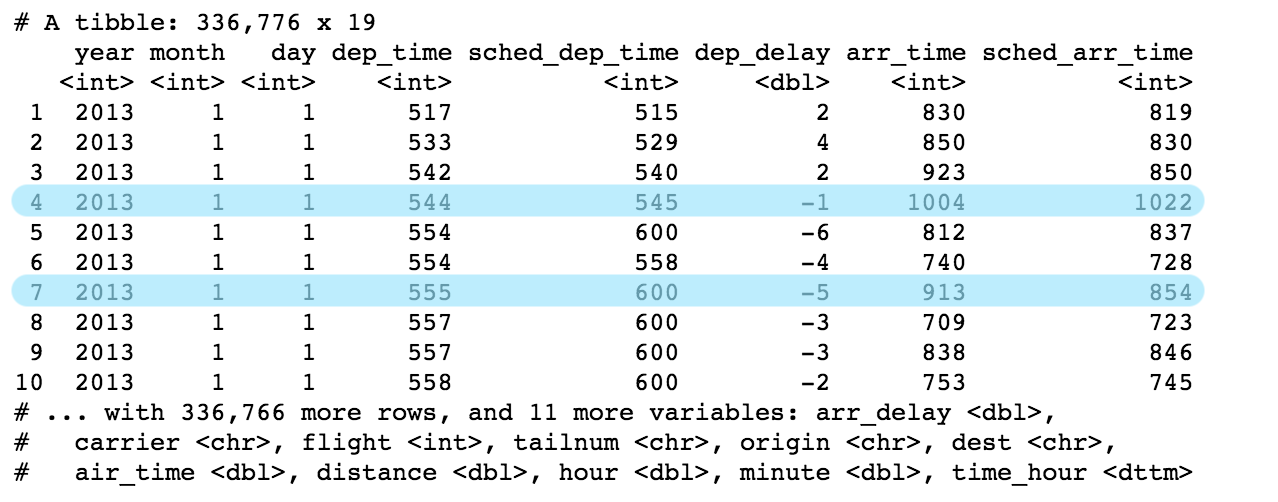

#### Select
`select()` selects columns
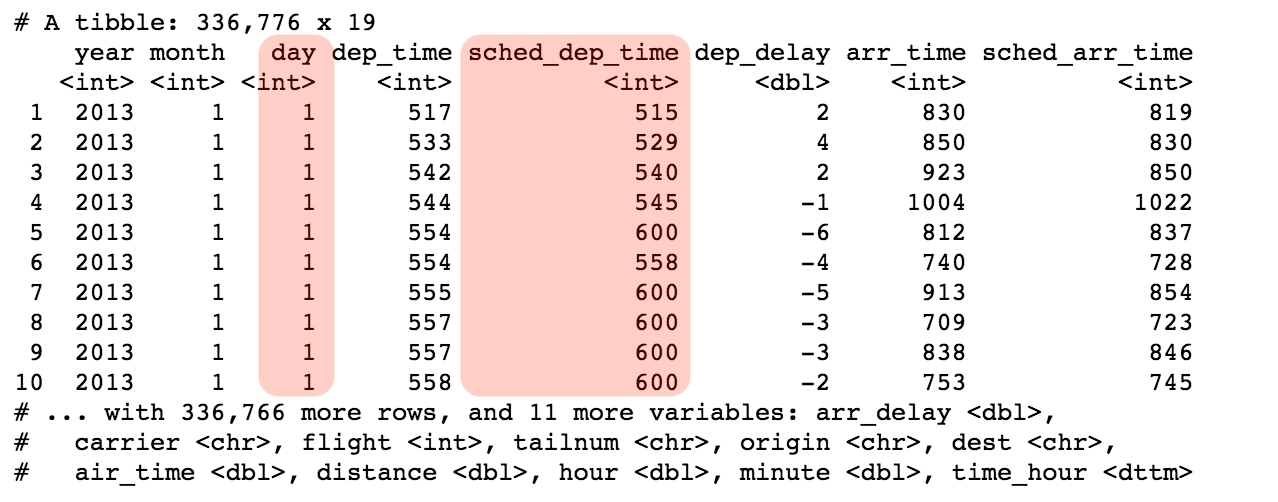

#### When to quote
Columns should not be quoted inside of commands like `filter()`. The following command returns an empty data table. Why? Because the condition evaluates to `FALSE`, which is then recycled up to every row of the table:

In [101]:
# filter(flights, carrier == `United Airlines`)  %>% print

# filter(flights, carrier == `UA`)  %>% print # produces an error: compares the column carrier to the (nonexistent) column UA

filter(flights, carrier == 'UA')  %>% print

# A tibble: 58,665 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      554            558        -4      740            728
 4  2013     1     1      558            600        -2      924            917
 5  2013     1     1      558            600        -2      923            937
 6  2013     1     1      559            600        -1      854            902
 7  2013     1     1      607            607         0      858            915
 8  2013     1     1      611            600        11      945            931
 9  2013     1     1      623            627        -4      933            932
10  2013     1     1      628            630        -2     1016            947
# … with 58,655 more rows, a

#### `=` versus `==`
Remember that `=` and `==` mean different things. The former is used for assignment and to pass keyword parameters to functions. The latter is used to test for equality and returns either `TRUE` or `FALSE`.

In [21]:
#mutate(flights, carrier = "UA")  %>% select(carrier) %>% print
filter(flights, carrier == "UA")  ## error

      year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1     2013 1     1   517      515             2         830      819          
2     2013 1     1   533      529             4         850      830          
3     2013 1     1   554      558            -4         740      728          
4     2013 1     1   558      600            -2         924      917          
5     2013 1     1   558      600            -2         923      937          
6     2013 1     1   559      600            -1         854      902          
7     2013 1     1   607      607             0         858      915          
8     2013 1     1   611      600            11         945      931          
9     2013 1     1   623      627            -4         933      932          
10    2013 1     1   628      630            -2        1016      947          
11    2013 1     1   643      646            -3         922      940          
12    2013 1     1   644      636             8     

#### Vector versus column versus data table
There is particular confusion about when it is appropriate to use vectors, columns and data tables. We will be discussing these concepts at greater length in the coming weeks, but here are some essentials that you should know:

**Vectors** in R contain multiple values. You create vectors using the `c()` function. If you do neglect to do this, R will produce an error and/or do the wrong thing. Some examples of this I saw include:
```{r}
a = factor(b, levels=1, 2, 3, 4, 5) ## wrong
a = factor(b, levels=(1, 2, 3, 4, 5)) ## wrong
a = factor(b, levels=c(1, 2, 3, 4, 5)) ## correct
```

Vectors have a particular type, and all the entries of the vector must be of that same type; if they are not R will convert them to be.

In [22]:
c(1,2,'a')  # conversion to string
c(T, T, factor('a'))  # conversion to int

[1] "1" "2" "a"

[1] 1 1 1

You can think of a data table as a list of vectors. Each column has its own vector. To access a vector of values stored in a column in R, we traditionally use the `$` operator:

In [23]:
class(select(flights, tailnum))
typeof(flights$tailnum)

[1] "tbl_df"     "tbl"        "data.frame"

[1] "character"

If working inside one of the `dplyr` functions like `mutate()`, `filter()`, etc., the dataset is specified by the first parameter. So you don't need to use the `$` operator, just specify the column name:
```{r}
filter(flights, flights$arr_delay < 10)  # wrong (although it will work)
filter(flights, arr_delay < 10)  # correct
```

Even though they contain the same information, a column vector is *not the same* as a table containing only that column:

In [24]:
head(flights$arr_time)  # <---- vector     
# is different from...
head(select(flights, arr_time)) # <---- data table

[1]  830  850  923 1004  812  740

  arr_time
1  830    
2  850    
3  923    
4 1004    
5  812    
6  740    

Passing in a data table where R expects a vector will lead to errors. For example, neither of the following are valid:
```{r}
month_factor = factor(flights)
month_factor = factor(select(flights, month))
```
These will take a large amount of time to run because R is creating a huge factor, one with a level for every observation in your data table.

## Exploratory data analysis
We'll wrap up this week with some practice performing exploratory data analysis (EDA).

The file `bil.RData` contains a dataset on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html): who they are, where they are from, how & when they made their fortune, etc.

In [102]:
load('bil.RData')
print(bil)

# A tibble: 2,614 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi… Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financi… United Sta… Fidelity In… new          USA               1946
 3    59 Non-Tra… Brazil      Companhia B… new          BRA               1948
 4    61 New Sec… Germany     Ratiopharm   new          DEU               1881
 5    -1 Financi… Hong Kong   Swire        new          HKG               1816
 6    -1 Traded … Bahrain     YBA Kanoo    new          BHR               1890
 7    -1 New Sec… Japan       Otsuka Hold… new          JPN               1921
 8    -1 Traded … Japan       Sony         new          JPN               1946
 9    66 Financi… Japan       Mori Buildi… new          JPN               1959
10    -1 Traded … France      Chanel       new          FRA               1909
# … with 2,604 more rows, and

## Visualizing discrete distributions
We already saw how to visualize the distribution of a discrete random variable: make a bar plot. For example, in the `billionaire` data set, `region` is categorical:

In [103]:
count(bil, region)

  region                   n  
1 East Asia                535
2 Europe                   698
3 Latin America            182
4 Middle East/North Africa 117
5 North America            992
6 South Asia                69
7 Sub-Saharan Africa        20
8 NA                         1

Say we are interested in the distribution of `region`. We can plot a bar chart to visualize this:

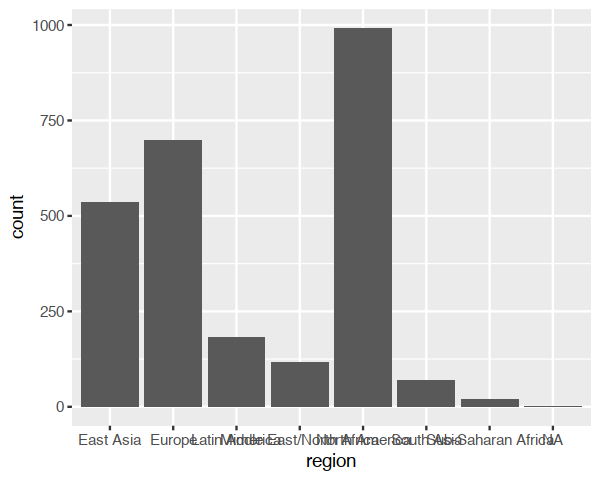

In [27]:
ggplot(data = bil) + geom_bar(mapping = aes(x = region))

## Continuous random variables
We cannot directly use a bar plot to visualize a continuous random variable, because every observation potentially has a different value. Instead we create a **histogram**. The command to do this is **geom_histogram**.

Let's visualize the distribution of wealth among billionaires. 

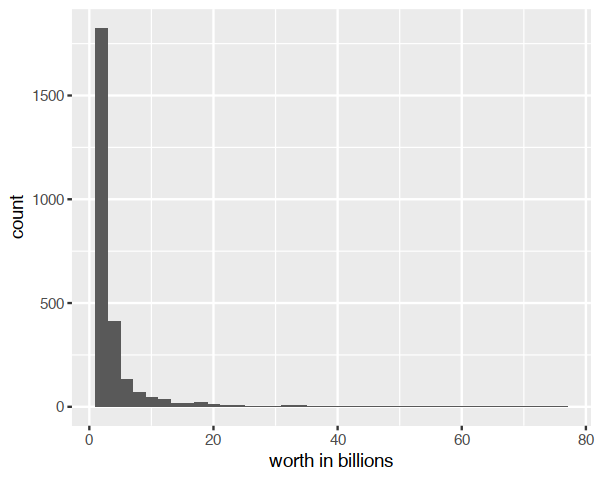

In [105]:
bil %>% ggplot +
    geom_histogram(mapping = aes(x = `worth in billions`), 
                   binwidth = 2)

Most billionaires are worth a paltry \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

A histogram is basically a bar plot where the continuous random variable has been *quantized* into one of a finite number of values.

## Typical and Atypical Values
In EDA, it is a good idea to try and get a sense of what constitutes a "typical" value in your data. Let's look at the disribution of the ages of billionaires:

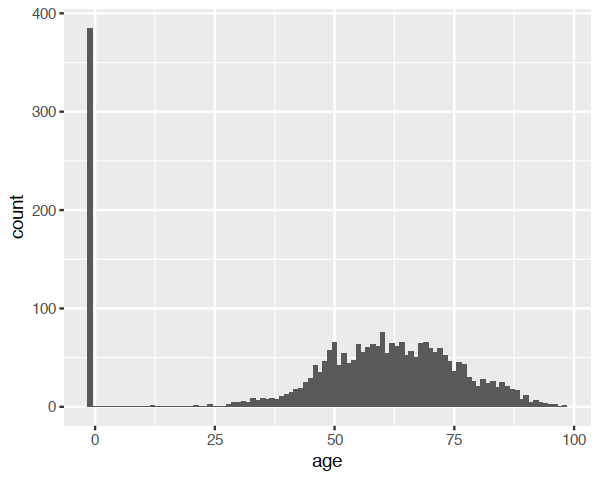

In [106]:
bil %>% mutate(age = ifelse(is.na(age), -1, age)) %>% ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero:

In [30]:
filter(bil, age < 10) %>% arrange(age) %>% print

# A tibble: 385 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi… Saudi Arab… Rolaco Trad… new          SAU               1968
 2    -1 Financi… Hong Kong   Swire        new          HKG               1816
 3    -1 Traded … Bahrain     YBA Kanoo    new          BHR               1890
 4    -1 New Sec… Japan       Otsuka Hold… new          JPN               1921
 5    -1 Traded … Japan       Sony         new          JPN               1946
 6    -1 Traded … France      Chanel       new          FRA               1909
 7    -1 Non-Tra… Mexico      Groupo IUSA  new          MEX               1939
 8    -1 Financi… Mexico      Pulsar Inte… new          MEX               1981
 9    -1 Traded … Netherlands Heineken In… new          NLD               1864
10    -1 <NA>     United Sta… MBNA         subsidiary   USA               1982
# … with 375 more rows, and 15 

These represent missing data where we do not know the person's age. We'll fix this by *recoding* all values of -1 to `NA`:

In [111]:
 bil <- mutate(bil, age = na_if(age, -1))

Note that this can also be written more cleanly as 

```bil <- mutate(bil, age = na_if(age, -1)) %>% print```

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [32]:
(q = quantile(bil$age, probs=c(.01, .5, .99), na.rm=T))

   1%   50%   99% 
32.28 62.00 90.00 

This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

### Exercise
Reproduce the following plot, showing the age distribution of billionaires between the 25th and 75th percentiles:
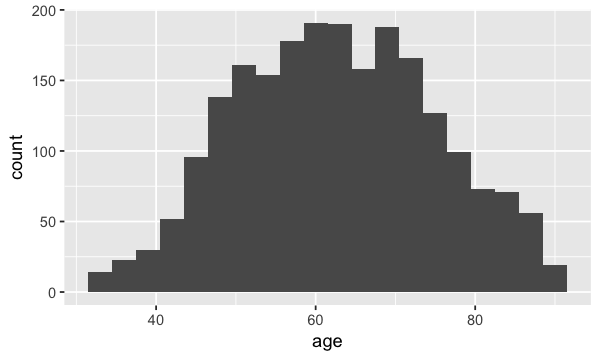

## Diamond pricing
Here is another example where EDA turns up something unexpected. Let's look at the distribution of `diamonds$carat`.

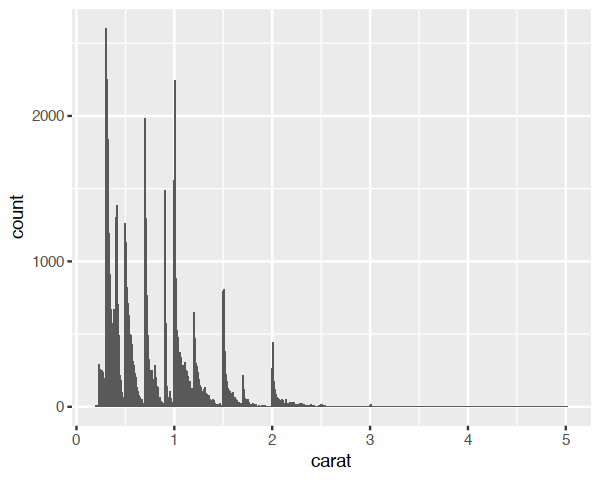

In [113]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), 
                   binwidth = .01)

What's going on near 3? Let us investigate...

In [34]:
filter(diamonds, carat > 3) %>% arrange(carat) %>% print

# A tibble: 32 x 10
   carat cut     color clarity depth table price     x     y     z
   <dbl> <ord>   <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  3.01 Premium I     I1       62.7    58  8040  9.1   8.97  5.67
 2  3.01 Premium F     I1       62.2    56  9925  9.24  9.13  5.73
 3  3.01 Fair    H     I1       56.1    62 10761  9.54  9.38  5.31
 4  3.01 Premium G     SI2      59.8    58 14220  9.44  9.37  5.62
 5  3.01 Ideal   J     SI2      61.7    58 16037  9.25  9.2   5.69
 6  3.01 Ideal   J     I1       65.4    60 16538  8.99  8.93  5.86
 7  3.01 Premium I     SI2      60.2    59 18242  9.36  9.31  5.62
 8  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
 9  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
10  3.01 Good    I     SI2      63.9    60 18242  9.06  9.01  5.77
# … with 22 more rows


Okay, now let us zoom into the **carat** range around 1.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


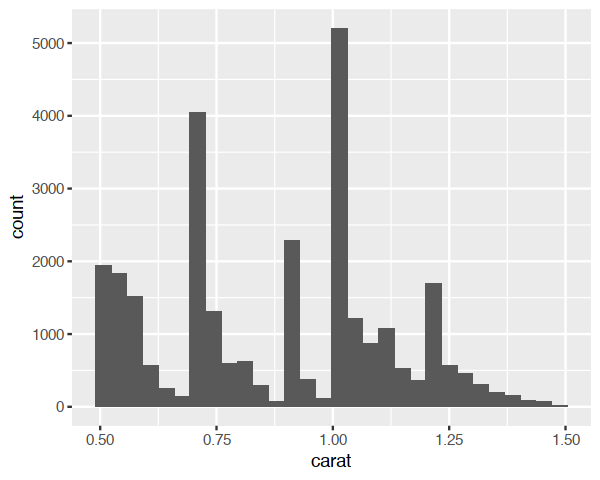

In [119]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% 
    ggplot() + geom_histogram(mapping = aes(x = carat))

What might explain the strange histogram above? Tendency to round the **carat** values? It seems like certain values are particularly likely to be rounded. Let's refine the plot using the `breaks=` option to investigate further:

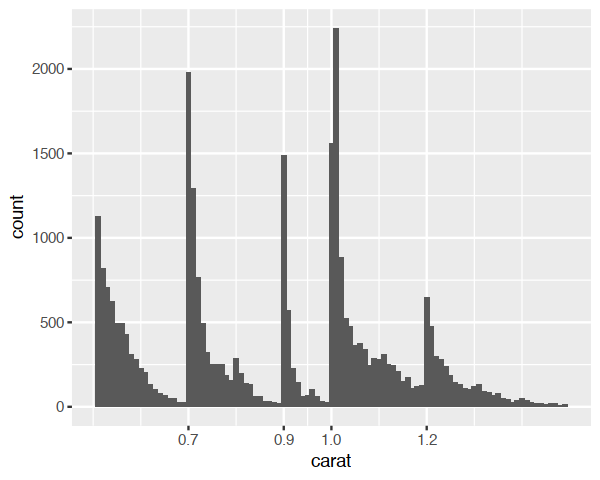

In [36]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% ggplot() + geom_histogram(mapping = aes(x = carat), 
    binwidth = 0.01) + scale_x_continuous(breaks=c(.7,.9,1.,1.2))

Sure enough, there are certain values of carat that people seem to particularly desire.